In [1]:
import sys

parent_dir = '/home/sei/tetrahedron_pair_ML'
sys.path.append(parent_dir)

import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import src.GeometryUtils as gu

tetrahedron_dataset = pd.read_csv('/home/sei/tetrahedron_pair_ML/data/processed/train/train_data.csv')

### Dataset Structure:

In [2]:
tetrahedron_dataset.head()

,T1_v1_x,T1_v1_y,T1_v1_z,T1_v2_x,T1_v2_y,T1_v2_z,T1_v3_x,T1_v3_y,T1_v3_z,T1_v4_x,...,T2_v2_y,T2_v2_z,T2_v3_x,T2_v3_y,T2_v3_z,T2_v4_x,T2_v4_y,T2_v4_z,IntersectionVolume,HasIntersection
0,0.383157,0.905558,0.365346,0.913810,0.167558,0.168535,0.952424,0.200233,0.895951,0.331678,...,0.131988,0.815787,0.991307,0.788799,0.795022,0.385947,0.304029,0.159888,0.016217,1.0
1,0.023464,0.234366,0.944543,0.362827,0.363533,0.264083,0.484792,0.676791,0.791825,0.942978,...,0.190486,0.959220,0.698028,0.568266,0.886391,0.705997,0.362360,0.007070,0.013578,1.0
2,0.330971,0.649372,0.516044,0.564632,0.155916,0.989816,0.683726,0.983948,0.594227,0.508041,...,0.343564,0.579347,0.439167,0.677728,0.853643,0.011557,0.594083,0.089550,0.011251,1.0
3,0.682230,0.625979,0.844548,0.367570,0.783966,0.020903,0.011117,0.997841,0.806984,0.124751,...,0.413844,0.286319,0.535639,0.926211,0.402346,0.347258,0.710204,0.957467,0.012233,1.0
4,0.370549,0.210335,0.899842,0.635747,0.812016,0.123454,0.324091,0.545377,0.423992,0.416280,...,0.717678,0.844398,0.617499,0.480213,0.015629,0.571784,0.029485,0.974345,0.012460,1.0


- **Tetrahedrons:**
  - Each entry includes two tetrahedrons.
  - Each tetrahedron has four vertices.
  - Each vertex is defined by three coordinates (x, y, z).

- **Features:**
  - There are 12 features per tetrahedron, leading to 24 features total.
  - Column names follow the pattern `Tₜ_Vᵥ_α`, where:
    - `ₜ` = Tetrahedron number (1 or 2)
    - `ᵥ` = Vertex number (1 to 4)
    - `α` = Coordinate axis (x, y, or z)
  - Coordinates are normalized between 0 and 1.
  - Each coordinate is randomly generated through a i.i.d process.

- **Output Variables:**
  - **Intersection Status:**
    - Stored in the "intersection_status" column.
    - Values: `0` (no intersection) or `1` (intersection).
  - **Intersection Volume:**
    - Stored in the "intersection_volume" column.
    - Value is a non-negative real number.

### Input and Output Spaces:

- **Input Space:**
  - Represented as a vector in $\mathbb{R}^{24}$, where each coordinate is within the range $[0, 1]$.

- **Output Space:**
  - $\{0, 1\}$ for "HasIntersection".
  - $\mathbb{R}^{\geq 0}$ for "IntersectionVolume"

### Statistics


In [3]:
tetrahedron_dataset.describe()

,T1_v1_x,T1_v1_y,T1_v1_z,T1_v2_x,T1_v2_y,T1_v2_z,T1_v3_x,T1_v3_y,T1_v3_z,T1_v4_x,...,T2_v2_y,T2_v2_z,T2_v3_x,T2_v3_y,T2_v3_z,T2_v4_x,T2_v4_y,T2_v4_z,IntersectionVolume,HasIntersection
count,73786.000000,73786.000000,7.378600e+04,7.378600e+04,73786.000000,73786.000000,73786.000000,73786.000000,73786.000000,73786.000000,...,73786.000000,73786.000000,73786.000000,73786.000000,73786.000000,73786.000000,7.378600e+04,73786.000000,73786.000000,73786.0
mean,0.499501,0.500240,4.996216e-01,5.006305e-01,0.501185,0.498508,0.499026,0.499634,0.499562,0.500187,...,0.501004,0.497084,0.500946,0.499591,0.499947,0.499739,4.977151e-01,0.502141,0.013961,1.0
std,0.311209,0.309864,3.099932e-01,3.105667e-01,0.310711,0.310345,0.310816,0.309719,0.311382,0.310037,...,0.310286,0.310411,0.311838,0.310314,0.310024,0.310451,3.108162e-01,0.310597,0.002548,0.0
min,0.000025,0.000005,3.743917e-07,4.991889e-07,0.000002,0.000011,0.000005,0.000006,0.000025,0.000003,...,0.000029,0.000010,0.000004,0.000009,0.000009,0.000024,6.183982e-07,0.000006,0.010000,1.0
25%,0.208786,0.212817,2.107431e-01,2.123436e-01,0.211780,0.209298,0.209799,0.211837,0.208774,0.211141,...,0.212683,0.209109,0.209645,0.210328,0.211997,0.211037,2.063129e-01,0.213709,0.011845,1.0
50%,0.499545,0.500240,5.007504e-01,5.011972e-01,0.501542,0.496030,0.501575,0.499622,0.500470,0.500465,...,0.503936,0.492870,0.502554,0.500081,0.500837,0.500102,4.972586e-01,0.500520,0.013689,1.0
75%,0.788817,0.787954,7.870442e-01,7.895776e-01,0.790499,0.786966,0.787328,0.788771,0.788478,0.787047,...,0.788272,0.785480,0.792064,0.787873,0.788254,0.788501,7.873141e-01,0.792619,0.015757,1.0
max,0.999963,0.999993,9.999981e-01,9.999911e-01,1.000000,0.999974,0.999994,0.999989,0.999997,0.999996,...,0.999987,0.999982,0.999988,0.999982,0.999995,0.999982,9.999924e-01,0.999992,0.020000,1.0


#### Class Balance

In [4]:
total_entries = len(tetrahedron_dataset)
status_0_count = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 0].shape[0]
status_1_count = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 1].shape[0]

percentage_status_0 = (status_0_count / total_entries) * 100
percentage_status_1 = (status_1_count / total_entries) * 100

print(f"Percentage of entries with HasIntersection = 0: {percentage_status_0:.2f}%")
print(f"Percentage of entries with HasIntersection = 1: {percentage_status_1:.2f}%")

Percentage of entries with HasIntersection = 0: 0.00%
Percentage of entries with HasIntersection = 1: 100.00%


#### Coordinates precision

In [5]:
# Extract all coordinate columns
coordinate_columns = [col for col in tetrahedron_dataset.columns if '_v' in col]

def calculate_precision(value):
    value_str = str(value)
    if '.' in value_str:
        return len(value_str.split('.')[1])
    else:
        return 0

max_precision = 0
min_precision = float('inf')

for col in coordinate_columns:
    col_precision = tetrahedron_dataset[col].map(calculate_precision)
    max_precision = max(max_precision, col_precision.max())
    min_precision = min(min_precision, col_precision.min())

print(f"Min coordinate precision in the dataset: {min_precision} decimal places")
print(f"Max coordinate precision in the dataset: {max_precision} decimal places")

Min coordinate precision in the dataset: 10 decimal places
Max coordinate precision in the dataset: 16 decimal places


#### Coordinates distribution

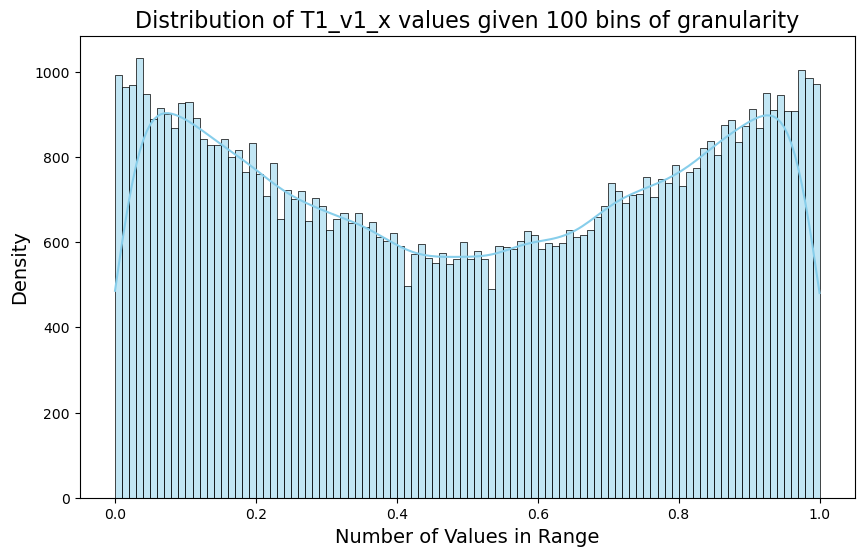

In [6]:
# Plotting the distribution of 'T1_v1_x' (Tₜ_Vᵥ_α, will have similar distributions)
bins = 100
plt.figure(figsize=(10, 6))
sns.histplot(tetrahedron_dataset['T1_v1_x'], kde=True, bins=bins, color='skyblue')
plt.title(f'Distribution of T1_v1_x values given {bins} bins of granularity', fontsize=16)
plt.xlabel('Number of Values in Range', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

#### Tetrahedron volume distribution

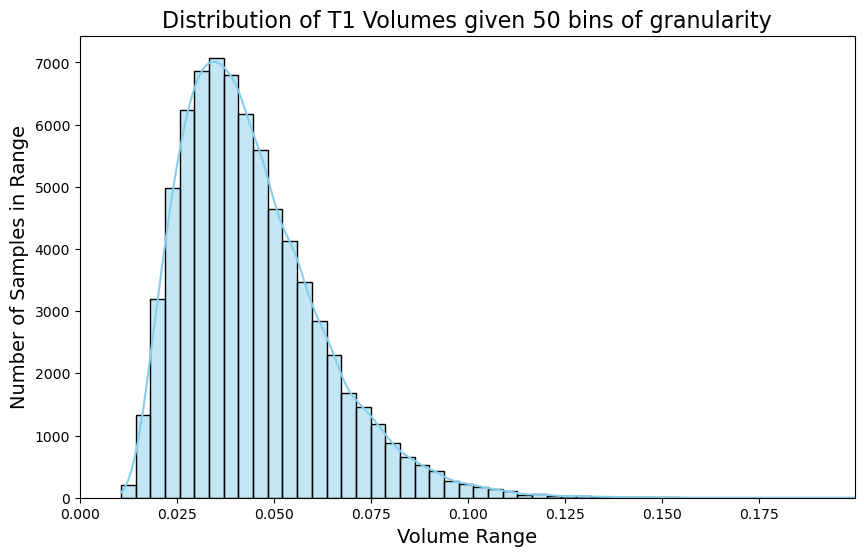

In [7]:
def extract_t1_vertices(row):
    return torch.tensor([
        [row['T1_v1_x'], row['T1_v1_y'], row['T1_v1_z']],
        [row['T1_v2_x'], row['T1_v2_y'], row['T1_v2_z']],
        [row['T1_v3_x'], row['T1_v3_y'], row['T1_v3_z']],
        [row['T1_v4_x'], row['T1_v4_y'], row['T1_v4_z']]
    ])


t1_volumes = []
for _, row in tetrahedron_dataset.iterrows():
    t1_vertices = extract_t1_vertices(row)
    volume = gu.calculate_tetrahedron_volume(t1_vertices)
    t1_volumes.append(volume.item())


bins = 50
plt.figure(figsize=(10, 6))
sns.histplot(t1_volumes, kde=True, bins=bins, color='skyblue', alpha=0.5)
plt.title(f'Distribution of T1 Volumes given {bins} bins of granularity', fontsize=16)
plt.xlabel('Volume Range', fontsize=14)
plt.ylabel('Number of Samples in Range', fontsize=14)
plt.xlim(0, max(t1_volumes))

plt.show()

#### Intersection volume distribution

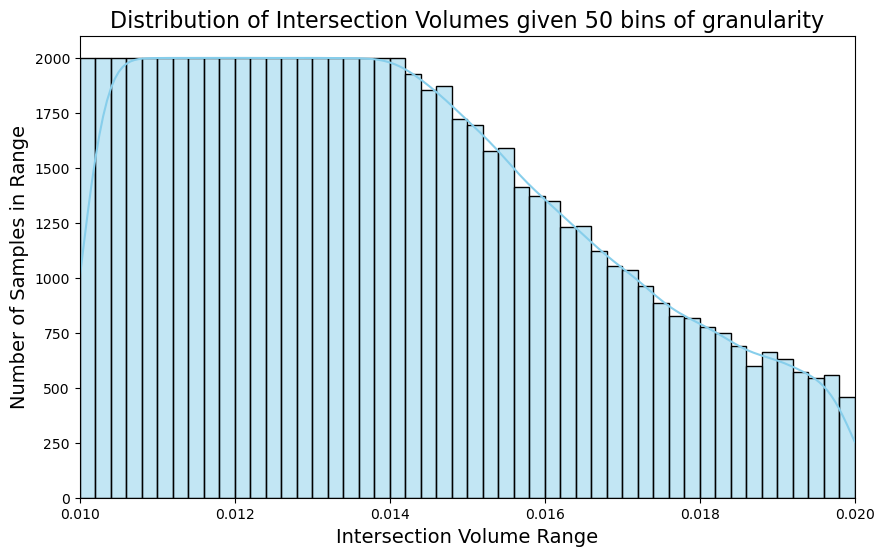

In [9]:
intersecting_cases = tetrahedron_dataset[tetrahedron_dataset['IntersectionVolume'] > 0]
bins = 50
plt.figure(figsize=(10, 6))
sns.histplot(intersecting_cases['IntersectionVolume'], kde=True, bins=bins, color='skyblue', alpha=0.5)
plt.title(f'Distribution of Intersection Volumes given {bins} bins of granularity', fontsize=16)
plt.xlabel('Intersection Volume Range', fontsize=14)
plt.ylabel('Number of Samples in Range', fontsize=14)
plt.xlim(0.01, 0.02)
plt.show()